# **Descripción del proyecto**
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

### **Paso 1. Abre el archivo de datos y estudia la información general**

In [10]:
import pandas as pd
games_df = pd.read_csv(r'C:\Users\Lorenzo\Desktop\ORDER_L8R\Data_Analysis\TripleTen\Sprints\Sprint_5\Capitulos\Capitulo_3\proyecto_sprint_5\games.csv', sep=',')

In [11]:
games_df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [12]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### **Paso 2. Prepara los datos**
* Reemplaza los nombres de las columnas (ponlos en minúsculas).
* Convierte los datos en los tipos necesarios.
* Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
* Si es necesario, elige la manera de tratar los valores ausentes:
  * Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
  * ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
  * Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
* Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [18]:
# Reemplaza los nombres de las columnas poniendolos en minusculas
games_df.columns = games_df.columns.str.lower()

# Convierte los datos en los tipos necesarios
# Convertir 'year_of_release' a int, ignorando NaN
games_df['year_of_release'] = games_df['year_of_release'].astype('Int64')
# Convertir 'user_score' a float y los valores "tbd" se transformaran en NaN
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

# Descripción de los cambios
"""
- 'year_of_release' se convirtio a enteros para reflejar mejor la naturaleza de los datos, que representan años.
- 'user_score' se convirtió de object a float para poder realizar operaciones numéricas (en caso que sea necesario). 
  'tbd' en 'user_score' se trató como NaN porque 'to be determined' indica una ausencia de valor.
"""

# Tratamiento de valores ausentes
# Decisión basada en el contexto: rellenar 'critic_score' y 'user_score' con la media podría ser una opción,
# pero podría distorsionar el análisis si los datos ausentes tienen un patrón. 
# Para este ejemplo, se dejarán como NaN para evitar suposiciones incorrectas.
# Es necesario hacer un analisis mas profundo para averiguar por qué los datos podrían estar ausentes.

# Manejo de 'tbd'
# Ya se manejo convirtiendolo a NaN durante la conversion de tipo de 'user_score'.

# Calcular las ventas totales para cada juego
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Verificacion de cambios
display(games_df)
games_df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


In [17]:
# Proporcion de valores nulos en las columnas:
100*games_df.isna().sum()/games_df.shape[0]

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
total_sales         0.000000
dtype: float64

Para evitar un analisis sesgado, los valores ausentes en critic_score, user_score, y rating seran ignorados. Sin embargo, hay que hacer algo al respecto con los valores nulos en 'name' y 'genre'. 

Para abordar los valores nulos en las columnas 'name' y 'genre', se realizara lo siguiente:

In [15]:
# Revisar si los valores nulos en 'name' y 'genre' se repiten en las mismas filas
null_name_genre = games_df[games_df['name'].isnull() | games_df['genre'].isnull()]

# Decision sobre registros con valores nulos en 'name' y 'genre'
# Se eliminaran las filas donde 'name' o 'genre' sean nulos
games_df_cleaned = games_df.dropna(subset=['name', 'genre'])

# Resumen de acciones realizadas
games_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [16]:
# Proporcion de valores nulos en las columnas:
100*games_df_cleaned.isna().sum()/games_df_cleaned.shape[0]

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         54.586250
rating             40.471489
total_sales         0.000000
dtype: float64

Estatus en el DataFrame después de las operaciones para manejar los datos nulos:
* Eliminacion de entradas con datos nulos en 'name' y 'genre'

* Los valores ausentes en critic_score, user_score y year_of_release seran ignorados

### **Paso 3. Analiza los datos**
* Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
* Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
* Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
* Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
* ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
* Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
* Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
* Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
* Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [19]:
games_df_cleaned.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [28]:
# Paso 3.1: Análisis de cuántos juegos fueron lanzados en diferentes años.

# Conteo de juegos lanzados por año
games_by_year = games_df_cleaned['year_of_release'].value_counts().sort_index()

# Paso 3.2: Análisis de variaciones de ventas de una plataforma a otra.

# Suma de ventas totales por plataforma
total_sales_by_platform = games_df_cleaned.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

In [29]:
display(games_by_year)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: Int64

### **Lanzamientos de Juegos por Año**
* Tendencia Creciente hasta 2008: La cantidad de juegos lanzados por año muestra una tendencia creciente desde los inicios en 1980 hasta alcanzar un pico en 2008 y 2009 con más de 1400 lanzamientos cada año.

* Disminución Posterior a 2008: Después de 2008, la cantidad de lanzamientos anuales comienza a disminuir, especialmente notorio después de 2011. Esto podría deberse a cambios en la industria, como el aumento de costos de desarrollo, la consolidación de estudios de desarrollo, o un enfoque en calidad sobre cantidad.

* Significancia de Datos por Período: Los datos muestran que la mayor actividad en términos de lanzamientos de juegos se concentró entre 2001 y 2011, período que podría considerarse el más relevante para analizar tendencias de éxito y preferencias de género.

In [30]:
display(total_sales_by_platform)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

### **Ventas Totales por Plataforma**
* Plataformas Líderes: Las plataformas con mayores ventas totales son PS2, X360, PS3, Wii, y DS, indicando su dominio en el mercado durante sus respectivos períodos de actividad.

* Observaciones de Ventas por Plataforma:
  * PS2: La plataforma líder en ventas, lo que refleja su larga vida útil y extenso catálogo de juegos.
  * X360 y PS3: Siguen de cerca, lo que muestra la intensa competencia en la generación de consolas de séptima generación.
  * Wii: Destaca por sus innovaciones en control de juego y apelación a un mercado más amplio.
  * DS: Demuestra el éxito de las consolas portátiles en ciertos segmentos de mercado.

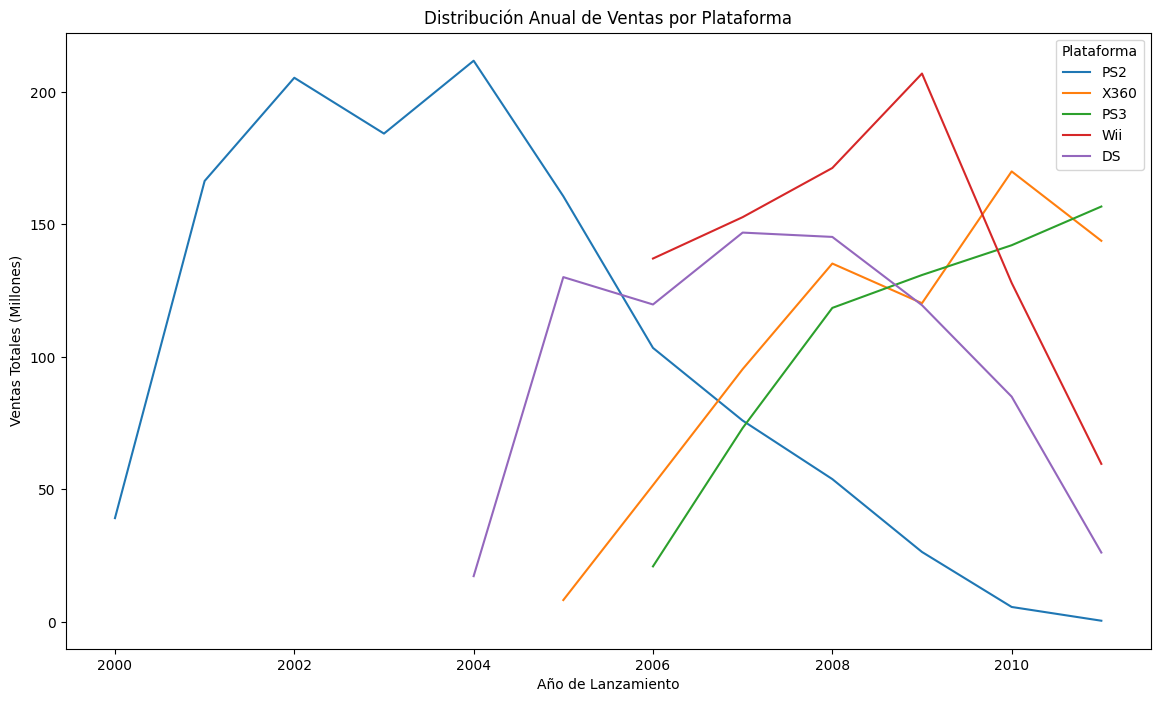

In [27]:
# Plataformas con mayores ventas totales seleccionadas para análisis
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Creare un DataFrame vacío para almacenar los resultados
yearly_sales = pd.DataFrame()

for platform in top_platforms:
    # Filtrare el DataFrame original para cada plataforma y agrupar por año de lanzamiento
    platform_sales = games_df_cleaned[games_df_cleaned['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    # Añadire los resultados al DataFrame yearly_sales
    yearly_sales[platform] = platform_sales

# Visualizacion de distribuciones en yearly_sales
import matplotlib.pyplot as plt

yearly_sales.plot(figsize=(14, 8))
plt.title('Distribución Anual de Ventas por Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (Millones)')
plt.legend(title='Plataforma')
plt.show()

### **Distribucion Anual de Ventas por Plataforma**
* La gráfica sugiere que la duración de la vida comercial de una plataforma de juegos es aproximadamente de 10 años, con un pico de ventas en algún punto intermedio.

* La aparición de nuevas plataformas y la desaparición de las antiguas están marcadas por la transición de una generación de consolas a la siguiente

### **Paso 4. Crea un perfil de usuario para cada región**
Para cada región (NA, UE, JP) determina:
* Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
* Los cinco géneros principales. Explica la diferencia.
* Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### **Paso 5. Prueba las siguientes hipótesis:**
* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:
* Cómo formulaste las hipótesis nula y alternativa.
* Qué criterio utilizaste para probar las hipótesis y por qué.

### **Paso 6. Escribe una conclusión general**
Formato: Completa la tarea en Jupyter Notebook. Inserta el código de programación en las celdas code y las explicaciones de texto en las celdas markdown. Aplica formato y agrega encabezados.